# Assignment_4
**Kaggle: Telco Customer Churn.**

In [253]:
import pandas as pd, numpy as np,matplotlib.pyplot as plt,seaborn as sns, plotly.graph_objects as go

In [254]:
telco = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [255]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [256]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [257]:
telco.shape

(7043, 21)

In [258]:
telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**1. Demographic:**

a. Which 2 demographics have proven to be the most popular with the telco brand?

b. If the marketing team wanted to increase customer retention, to whom should they target their advertisements to?

In [259]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [260]:
streaming_tv = telco.StreamingTV
tv_yes = streaming_tv[streaming_tv == 'Yes']
tv_yes.count()

2707

In [261]:
streaming_movies = telco.StreamingMovies
movies_yes = streaming_movies[streaming_movies == 'Yes']
movies_yes.count()

2732

In [262]:
phone = telco.PhoneService
phone_yes = phone[phone == 'Yes']
phone_yes.count()

6361

In [263]:
internet = telco.InternetService
internet_yes = internet[internet == 'Yes']
internet_yes.count()

0

In [264]:
multiple = telco.MultipleLines
multiple_yes = multiple[multiple == "Yes"]
multiple_yes.count()

2971

In [265]:
protection = telco.DeviceProtection
protection_yes = protection[protection == 'Yes']
protection_yes.count()

2422

In [266]:
security = telco.OnlineSecurity
security_yes = security[security == 'Yes']
security_yes.count()

2019

In [267]:
backup = telco.OnlineBackup
backup_yes = backup[backup == "Yes"]
backup_yes.count()

2429

**answer no 1, a.**

Phone services and multiple lines

**answer no 1,b.**

to increase customer retaintion, telco marketing should focus on the phone servises since they are most appreciated by customers

**2. Services:**

a. Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use visualizations in explaining your analysis)

b. If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?

In [268]:
telco.MonthlyCharges

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

<AxesSubplot:xlabel='PhoneService', ylabel='MonthlyCharges'>

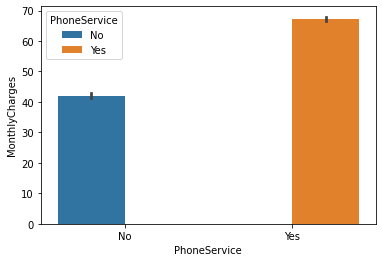

In [269]:
sns.barplot(x = 'PhoneService', y = 'MonthlyCharges',hue = "PhoneService", data = telco)

<AxesSubplot:xlabel='MultipleLines', ylabel='MonthlyCharges'>

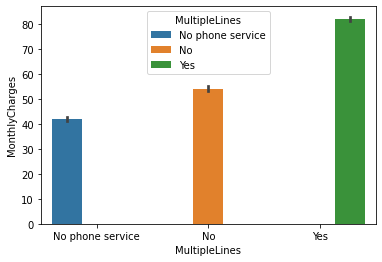

In [270]:
sns.barplot(x = 'MultipleLines', y = 'MonthlyCharges',hue = 'MultipleLines', data = telco)

<AxesSubplot:xlabel='StreamingMovies', ylabel='MonthlyCharges'>

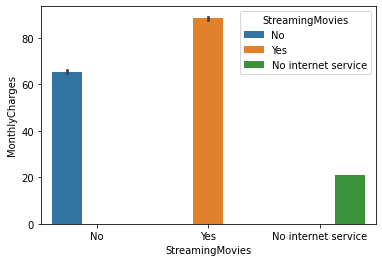

In [271]:
sns.barplot(x = 'StreamingMovies', y = 'MonthlyCharges', hue = 'StreamingMovies', data = telco)

<AxesSubplot:xlabel='DeviceProtection', ylabel='MonthlyCharges'>

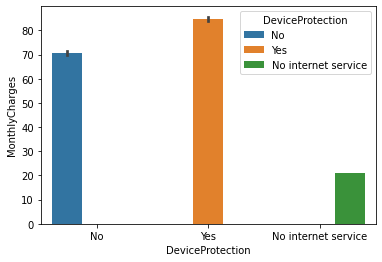

In [272]:
sns.barplot(x = 'DeviceProtection', y = 'MonthlyCharges', hue = 'DeviceProtection', data = telco )

<AxesSubplot:xlabel='StreamingTV', ylabel='MonthlyCharges'>

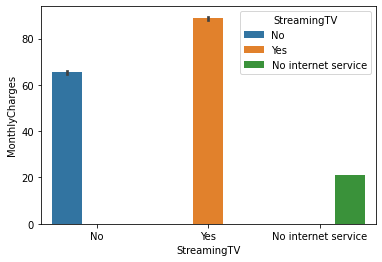

In [273]:
sns.barplot(x = 'StreamingTV', y = 'MonthlyCharges', hue = 'StreamingTV', data = telco)

<AxesSubplot:xlabel='OnlineBackup', ylabel='MonthlyCharges'>

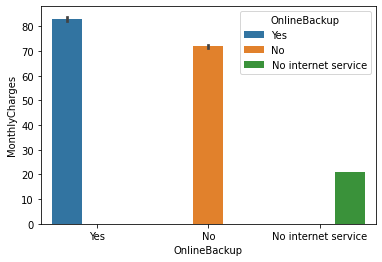

In [274]:
sns.barplot(x = 'OnlineBackup', y = 'MonthlyCharges', hue = 'OnlineBackup', data = telco)

In [275]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [276]:
telco['security_yes'] = security_yes
telco['phone_yes'] = phone_yes
telco['tv_yes'] = tv_yes
telco['multiple_yes'] = multiple_yes
telco['backup_yes'] = backup_yes
telco['internet_yes'] = internet_yes
telco['movies_yes'] = movies_yes
telco['protection_yes'] = protection_yes
#phone, tv,movies,internet,multiple,backup
telco.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,security_yes,phone_yes,tv_yes,multiple_yes,backup_yes,internet_yes,movies_yes,protection_yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,No,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,1889.5,No,Yes,Yes,NaN,NaN,NaN,NaN,NaN,Yes


<AxesSubplot:xlabel='OnlineSecurity', ylabel='MonthlyCharges'>

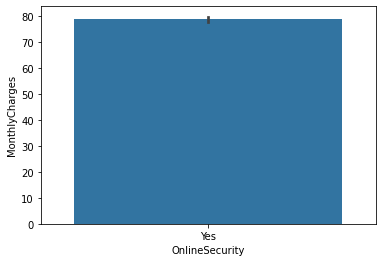

In [277]:
sns.barplot(x = security_yes, y ="MonthlyCharges", data = telco)


<AxesSubplot:xlabel='MultipleLines', ylabel='MonthlyCharges'>

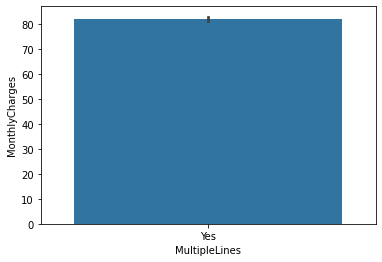

In [278]:
sns.barplot(x = multiple_yes , y = "MonthlyCharges", data = telco )

<AxesSubplot:xlabel='PhoneService', ylabel='MonthlyCharges'>

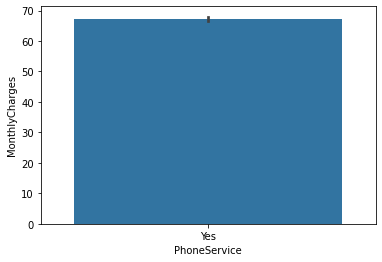

In [279]:
sns.barplot(x = phone_yes, y = "MonthlyCharges", data = telco )

In [280]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'security_yes', 'phone_yes', 'tv_yes', 'multiple_yes', 'backup_yes',
       'internet_yes', 'movies_yes', 'protection_yes'],
      dtype='object')

In [281]:
services = ['security_yes', 'phone_yes', 'tv_yes', 'multiple_yes', 'backup_yes',
       'internet_yes', 'movies_yes', 'protection_yes']

In [282]:
list(enumerate(services))

[(0, 'security_yes'),
 (1, 'phone_yes'),
 (2, 'tv_yes'),
 (3, 'multiple_yes'),
 (4, 'backup_yes'),
 (5, 'internet_yes'),
 (6, 'movies_yes'),
 (7, 'protection_yes')]

<AxesSubplot:xlabel='StreamingMovies', ylabel='MonthlyCharges'>

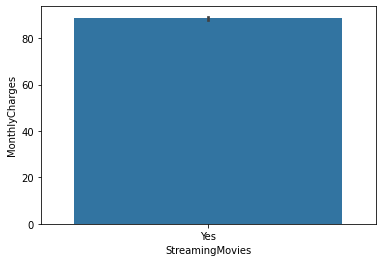

In [283]:
sns.barplot(x = movies_yes, y = 'MonthlyCharges', data = telco)

<AxesSubplot:xlabel='OnlineBackup', ylabel='MonthlyCharges'>

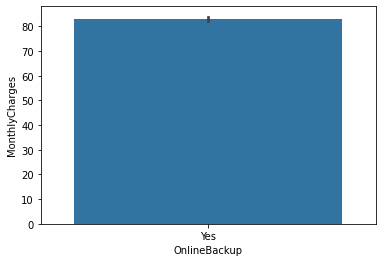

In [284]:
sns.barplot(x = backup_yes, y = 'MonthlyCharges', data = telco)

<AxesSubplot:xlabel='DeviceProtection', ylabel='MonthlyCharges'>

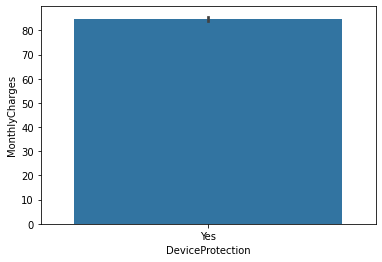

In [285]:
sns.barplot(x = protection_yes, y = 'MonthlyCharges', data = telco)

<AxesSubplot:xlabel='StreamingTV', ylabel='MonthlyCharges'>

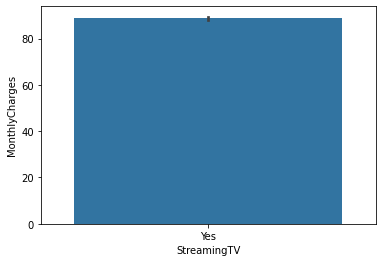

In [286]:
sns.barplot(x = tv_yes, y = 'MonthlyCharges', data = telco)


**3. Payment: (Use visualizations in explaining your analysis)**

a. If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning:

i. Basic
ii. Plus
iii. Premium

b. Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?

In [287]:
telco.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

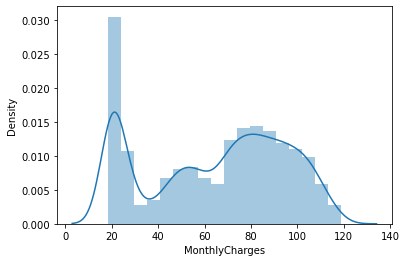

In [288]:
sns.distplot(telco.MonthlyCharges)
#

<AxesSubplot:xlabel='PaperlessBilling', ylabel='MonthlyCharges'>

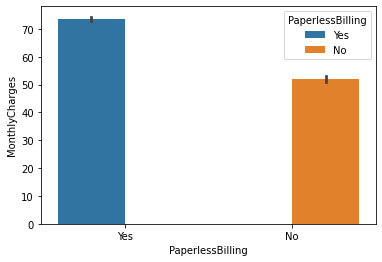

In [289]:
sns.barplot(x = 'PaperlessBilling', y = 'MonthlyCharges', hue = 'PaperlessBilling',data = telco)
#b)  a majority of customers prefer paperless billing and therefore telco should consider this option.